In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import square
from scipy.io.wavfile import read, write
from IPython.display import Audio, Image
from scipy.fftpack import fft
%matplotlib inline

# Visualizing Time Series Data 

In a physical experiment, oftentimes the data we are collecting is acquired over time. One simple way to visualize such a dataset is to just plot each data point as a function of time, which is exactly what we did in weeks 4 and 5 with the Vela Pulsar data that the Fermi Gamma-ray Space Telescope has been collecting for 13 years. We saw that this representation of the data was useful for quantifying the correlation between gamma-ray fluctuations and time, and we even fit a model that described how the data changed as time went on. 

In this next set of notebooks, we are going to explore a complementary visualization of the data that decomposes a time-based dataset, or time series signal, into the various frequency components that make up the signal. Although this might sound confusing and abstract at first, one intuitive way to understand this concept is by applying these techniques to music!



Below, we will begin by downloading various audio files that we have provided for you. Please select one music file (whichever one you want, the choice is not important for the rest of the lab) and play it to make sure you can hear the music.

In [53]:
## UN-COMMENT ONE OF THE AUDIO FILES BELOW BY REMOVING THE # SYMBOL

#wav = os.path.join('audio_files','ImperialMarch60.wav')
#wav = os.path.join('audio_files','Fanfare60.wav')
#wav = os.path.join('audio_files','CantinaBand60.wav')
#wav = os.path.join('audio_files','PinkPanther60.wav')


sr, samps = read(wav)
Audio(samps, rate=sr)

Now that you have listened to the music, we will visualize the audio as a function of time. 

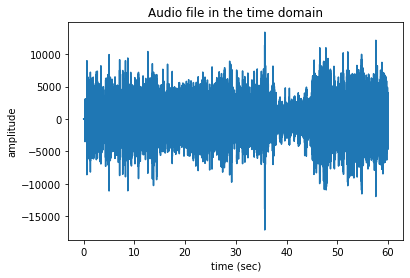

In [54]:
samples_per_second = sr
total_samples = len(samps)
time_seconds = total_samples / samples_per_second
time_vector = np.linspace(0, time_seconds, total_samples)

plt.plot(time_vector, samps)
plt.title("Audio file in the time domain");
plt.xlabel('time (sec)');
plt.ylabel('amplitude');

In this representation, the amplitude of the audio signal relates to the volume of the sound being heard. Sound is fundamentally made up of acoustic waves that create vibrations in a medium, and in a sound recording device (a microphone) these vibrations are collected and transformed into equivalent electronic waves that can be processed, edited, and eventually converted back into audio through a speaker system. Because of the natural interpretation of sound as being made up of waves, it makes sense for us to represent the audio in terms of the frequency components that make up the sound, which you can see below.

In [55]:
def plotSpectrum(y,Fs):
 
 #Plots a Single-Sided, normalized frequency space representation
 #of a time series y with sampling rate Fs
 
    N = len(y) # length of the signal
    k = np.arange(N)
    T = N/Fs   # time spacing between samples
    frq = k/T # two sided frequency range
    frq = frq[range(N//2)] # one side frequency range

    Y = fft(y)/N # fft computing and normalization
    Y = Y[range(N//2)]
 
    plt.plot(frq,abs(Y)) # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.title('Frequency Domain Representation')


In [56]:
def plotTimeAndSpectrum(y,Fs):
 
 #Plots a Single-Sided, normalized frequency space representation
 #of a time series y with sampling rate Fs alongside its time series
 
    N = len(y) # length of the signal
    k = np.arange(N)
    T = N/Fs   # time spacing between samples
    frq = k/T # two sided frequency range
    frq = frq[range(N//2)] # one side frequency range

    Y = fft(y)/N # fft computing and normalization
    Y = Y[range(N//2)]
 
    
    time_vector = np.linspace(0, 1, N)

    plt.figure();
    plt.title('Time Domain Representation')
    plt.plot(time_vector, y);
    plt.xlabel('time (normalized)')
    plt.ylabel('amplitude')
    
    plt.figure();
    plt.title('Frequency Domain Representation')
    plt.plot(frq,abs(Y)) # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')

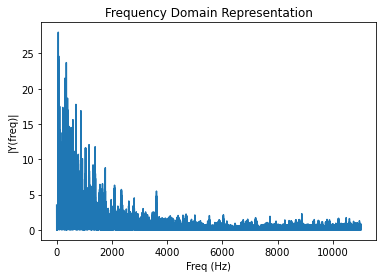

In [57]:
plotSpectrum(samps, sr)

# Questions for Discussion

1.1 What features of the music can be understood by the time domain plot? How well can these features be determined by just listening to the music?

1.2 What features of the music can be understood by the frequency domain plot? How well can these features be determined by just listening to the music? For example, can you associate specific sounds or instruments in the music with peaks in the frequency space plot?

1.3 Now choose a different music sample and compare/contrast the frequency space representation of the music. Does this make sense with what you hear from both files?

# Understanding the Fourier Transform

The frequency space plot above was created using a widely applicable mathematical tool known as the Fourier Transform. A "transform" in math converts a function of one variable into a function of a different variable, and in particular the Fourier transform gives us our original function in terms of its various frequency components. Information about the distribution and magnitude of frequencies that make up a signal is often way more useful for both studying and processing the data you have collected.

You will explore the mathemtical formalism of this method in future classes (probably multiple times), but for this lab we want to develop an intuition for how time series signals look in frequency space, starting with simple examples.

## A Note On Finite Sampling Rates (optional reading)

Because a truly continuous function would require infinitely many points to describe it, any digital waveform processing must rely on sampling the signal at a finite set of points such that we don't lose any information about the signal we are reading. This can be accomplished with a sampling rate (samples per second) higher than twice the largest frequency present in the signal, a result in signal processing theory known as Nyquist's theorem. When a signal is under-sampled (the sampling rate is lower than twice the signal frequency), we end up capturing a wave that is different from the original one, an effect known as aliasing. The figure below demonstrates this effect, where the sampled points (the black dots) determine the measured signal and the under-sampled signal leads to the incorrect wave. Because humans can hear in a frequency band (range) from about 20-20,000 Hz, a typical sampling rate for music is 44.1 kHz.

Another consequence of converting a continuous signal to a digital format made up finite samples is that a discrete version of the Fourier Transform has to be applied. This method converts a sequence of time series sampled data into an equally sized sequence of frequency space data. An efficient algorithm for computing the Discrete Fourier Transform, known as the Fast Fourier Transform (FFT), is what we have used for this lab.

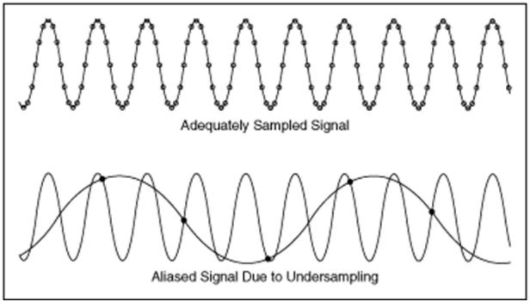

In [59]:
Image(filename= os.path.join('figures', 'aliasing.png')) 


### Single Sine Wave

We can see from the plot below that a wave with a single frequency has a very simple frequency space representation as a very narrow peak at that frequency. In real life, you could interpret this kind of signal as a pure tone, like one you would create when playing a single note on a piano. Note that while theoretically the peak in frequency space should be infinitely narrow, there is always some broadening of this peak due to the finite sampling rates mentioned above.


In [ ]:
Fs = 200;  # sampling rate
t = np.arange(0,1,1.0/Fs); # time vector

f = 10;   # frequency of the signal
sine = np.sin(2*np.pi*f*t);

plotTimeAndSpectrum(sine, Fs);


### Multiple Sine Waves

In [ ]:
Fs = 500;  # sampling rate
t = np.arange(0,1,1.0/Fs); # time vector

f1 = 5;   # frequency of the signal
sine1 = np.sin(2*np.pi*f1*t);

f2 = 25;
sine2 = 0.5*np.sin(2*np.pi*f2*t);

f3 = 50;
sine3 = 0.25*np.sin(2*np.pi*f3*t);

sig = sine1+sine2+sine3;

plotTimeAndSpectrum(sig, Fs);

### White Noise

In [ ]:
Fs = 1000;  # sampling rate
t = np.arange(0,1,1.0/Fs) # time vector

rand_sig = np.random.rand(len(t));
rand_sig = rand_sig - np.mean(rand_sig);
plotTimeAndSpectrum(rand_sig, Fs)

### Square Wave

In [ ]:
Fs = 1000;  # sampling rate
t = np.arange(0,1,1.0/Fs); # time vector

f = 25;
square_wave = square(2 * np.pi * f * t);

plt.figure();
plt.plot(t, square_wave);
plt.title('Time Domain Representation')

plt.figure();
plotSpectrum(square_wave, Fs)
plt.xticks(np.linspace(0, Fs/2, 11));

# Questions for Discussion

2.1 For each of the three signals above (not including the single sine wave): Was one representation of the data more informative than the other? Is there information that you can understand from one representation that you can't from the other?

2.2 For the square wave signal, how do you think the frequency component with the largest magnitude relates to the frequency of the square wave as a whole? 

2.3 Given your answer to 2.2, how would you then interpret the higher frequency components with smaller amplitude and their contribution to the square wave shape?  

# Spectral Signal Filtering

Now we will apply our understanding of frequency space and perform signal manipulation that suppresses certain frequencies while not disturbing others. This kind of signal filtering is useful, for example, when the signal of interest is separated from the noise in the data in frequency space, and so a suitable filter can remove the noise without removing the important signal. 

Two kinds of filters we will consider are "low-pass" and "high-pass" filters, which, like the names suggest, allow signals below or above a certain cut-off frequency to pass through while suppressing all other frequencies. An example of a low-pass filter with a cut-off frequency of 50 Hz is plotted below. 

In [ ]:
f_cutoff = 50;
b, a = signal.butter(1, f_cutoff, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, abs(h))
plt.title('Low-Pass filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude retention')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(f_cutoff, color='green') # cutoff frequency
plt.show()

Let's see how this low-pass filter performs on the square wave we studied above.

In [ ]:
f_cutoff = 50;

# change this variable from "lp" to "hp" to turn this into a high-pass filter
filter_type = 'lp'

sos = signal.butter(1, f_cutoff, filter_type, fs=1000, output='sos')

filtered_sig = signal.sosfilt(sos, square_wave)

plotTimeAndSpectrum(filtered_sig, 1000)

# Question for Discussion

3.1 How does the low-pass-filtered square wave differ from the unfiltered wave in the time domain and the frequency domain? If this changes your understanding of the frequency space form of the square wave, make sure to go back and re-answer questions 2.2/2.3. Hint: if this question isn't making sense, try switching the filter type in the cell above to a high-pass filter and see what remains of the square wave.

Next we will return to our music files, and see how high-pass filtering changes how the music sounds, as well as how it changes the frequency space representation.

In [ ]:
#Vary the cutoff frequency below for question 4.2
f_cutoff = 2000;

sos = signal.butter(4, f_cutoff, 'hp', fs=sr, output='sos')

filtered_sig = signal.sosfilt(sos, samps)

plotTimeAndSpectrum(filtered_sig, sr)



In [ ]:
Audio(filtered_sig, rate=sr)

# Questions for Discussion

4.1 Is the effect of the filter more clear in the time domain or the frequency domain?

4.2 How did the sound of the music change after filtering? Does this change agree with your intuition? Try varying the cut-off frequency in the code above to see when this effect becomes more or less significant.